# Color-magnitude diagram: narrowband filters

In this tutorial, we compute synthetic photometry for the VLT/SPHERE H2 and H3 filters from the [SpeX Prism Spectral Library](http://pono.ucsd.edu/~adam/browndwarfs/spexprism/index_old.html). Also, synthetic photometry is calculated from the AMES-Cond and AMES-Dusty isochrones and atmospheric model spectra. These are compared in a color-magnitude diagram with the photometric data of directly imaged planets.

## Getting started

In [1]:
import urllib.request
import numpy as np
import species

The isochrone will be extracted at an age of 20 Myr for 100 logarithmically spaced masses.

In [2]:
age = 20.  # [Myr]
masses = np.logspace(0., 4., 100)  # [Mjup]

Next, *species* is initiated by reading the configuration file from the working folder.

In [3]:
species.SpeciesInit()

Initiating species v0.1.1... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding data and models

A `Database` object is created which is used for adding data and models to the HDF5 database.

In [4]:
database = species.Database()

The available [photometric data of directly imaged companions](https://github.com/tomasstolker/species/blob/master/species/data/companions.py) is added. Alternative, `add_object` can be used to manually add the properties of an object.

In [5]:
database.add_companion(name=None)

Adding filter: LCO/VisAO.Ys... [DONE]
Adding Vega spectrum... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Gemini/NICI.ED286... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.NB374... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.NB405... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding object: beta Pic b... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Adding object: HIP 65426 b... [DONE]
Adding filter: MKO/NSFCam.J... [DONE]
Adding filter: MKO/NSFCam.H... [DONE]
Adding filter: MKO/NSFCam.K... [DONE]
Adding filter: Keck/NIRC2.Lp... [DONE]
Adding filter: Keck/NIRC2.Ms... [DONE]
Adding object: 51 Eri b... [DONE]
Adding filter: Subaru/CIAO.z... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_B_J... 

The spectra from the SpeX Prism Spectral Library are downloaded and added to the database. For each spectrum, the [SIMBAD Astronomical Database](http://simbad.u-strasbg.fr/simbad/) is queried for the SIMBAD name and parallax of the object. If the parallax is not available then several VizieR cataloges with data of brown dwarfs are queried (see [get_distance](https://github.com/tomasstolker/species/blob/master/species/data/queries.py)). A NaN value is stored for the distance if the parallax is not found. Therefore, these objects are not used in the color-magnitude diagram.

In [6]:
database.add_spectrum('spex')

Adding filter: 2MASS/2MASS.H... [DONE]
Adding SpeX Prism Spectral Library... 2MASS J13184794+1736117                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J13184794+1736117 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J213154.43-011939.3                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J21315444-0119374 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J04070885+1514565                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J09293364+3429527 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASSI J1807159+501531                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J14192618+5919047 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J15412408+5425598                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J04062677-3812102 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')
/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J03280716+3022432 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J16452207+3004071                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J04574903+3015195 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J00013044+1010146                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J01414839-1601196 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J18212815+1414010                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J12425052+2357231 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J22120703+3430351                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J03422594+3148496 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J121659.17+300306.3                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J18131803+5101246 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')
/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J16382073+1327354 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J16382073+1327354                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J05460407-0003228 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J20261584-2943124                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J01151621+3130061 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J104335.08+121314.1                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J19495702+6222440 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J14283132+5923354                   

/Users/tomasstolker/.pyenv/versions/3.6.0/envs/general3.6/lib/python3.6/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J14162394+1348363
  (error.line, error.msg))
/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J14162394+1348363 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J074201.41+205520.5                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J03023398-1028223 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J12490872+4157286                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J13452562+5216337 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J11145133-2618235                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J11181292-0856106 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')
/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J04382218+2553503 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J102109.69-030420.1                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J00150206+2959323 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J204317.69-155103.4                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J01340281+0508125 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J13571237+1428398                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J21555848+2345307 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J12373919+6526148                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J15575011-2952431 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J011912.22+240331.6                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J01191207+2403317 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J104842.84+011158.5                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J18282794+1453337 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J23515044-2537367                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J02425693+2123204 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASSW J1146345+223053                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J03431581+3210455 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J09243114+2143536                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J10595185+3042059 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASSI J2107316-030733                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J12474944-1117551 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J13313310+3407583                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J02055138-0759253 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASSW J0820299+450031                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J21513979+3402444 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J12373441+3028596                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J12373441+3028596 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J15561873+1300527                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J19163888-3700026 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... DENIS-P J1228.2-1547                      

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J01472702+4731142 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J05103520-4208140                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J13023811+5650212 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASSW J1728114+394859                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J17451618-2903156 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... LHS 217                                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J00025097+2454141 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J000250.98+245413.8                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J21210987+6557255 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J075840.33+324723.4                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J11582077+0435014 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J18244344+2937133                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J20342948+6727398 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')
/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J19415458+6826021 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J21512543-2441000                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J05363776+1000232 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J05341594-0631397                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J05341594-0631397 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASSI J1047538+212423                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J14343616+2202463 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J003609.26+241343.3                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J00360925+2413434 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J17220990-1158127AB                 

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J23512200+3010540 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J15461461+4932114                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J15461461+4932114 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J10461875+4441149                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J03001631+2130205 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... SDSS J121951.45+312849.4                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J04190126+2802487 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... HN Peg B                                  

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J10315064+3349595 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASS J02271036-1624479                   

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J01481478+1202447 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... DENIS-P J225210.73-173013.4               

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J04394748+2601407 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... DENIS J124514.1-442907                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J04480182-0557254 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... 2MASSI J1553022+153236                    

/Users/tomasstolker/applications/species/species/data/queries.py:209: UserWarning: No parallax was found for 2MASS J22274034+1753215 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')


Adding SpeX Prism Spectral Library... [DONE]                                    


The AMES-Cond en AMES-Dusty model spectra are also downloaded and included.

In [7]:
database.add_model(model='ames-cond',
                   wavel_range=(0.5, 10.),
                   spec_res=1000.
                   teff_range=(100., 4000.))

Unpacking AMES-Cond model spectra (823 MB)... [DONE]
Adding AMES-Cond model spectra... [DONE]                                        


In [8]:
database.add_model(model='ames-dusty',
                   wavel_range=(0.5, 10.),
                   spec_res=1000.
                   teff_range=(100., 4000.))

Unpacking AMES-Dusty model spectra [Fe/H]=0.0 (106 MB)... [DONE]
Adding AMES-Dusty model spectra... [DONE]                                       


/Users/tomasstolker/applications/species/species/util/data_util.py:268: UserWarning: Interpolation is not possible at the edge of the parameter grid. A NaN value is stored for Teff = 4000.0 K.
  warnings.warn(f'Interpolation is not possible at the edge of the '


The AMES-Cond and AMES-Dusty isochones are downloaded.

In [9]:
urllib.request.urlretrieve('https://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                           'data/model.AMES-Cond-2000.M-0.0.NaCo.Vega')

'data/model.AMES-dusty.M-0.0.NaCo.Vega'

In [ ]:
urllib.request.urlretrieve('https://phoenix.ens-lyon.fr/Grids/AMES-Dusty/ISOCHRONES/model.AMES-dusty.M-0.0.NaCo.Vega',
                           'data/model.AMES-dusty.M-0.0.NaCo.Vega')

And added to the database.

In [10]:
database.add_isochrones(filename='data/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                        isochrone_tag='iso_ames-cond')

Adding isochrones: iso_ames-cond... [DONE]


In [11]:
database.add_isochrones(filename='data/model.AMES-dusty.M-0.0.NaCo.Vega',
                        isochrone_tag='iso_ames-dusty')

Adding isochrones: iso_ames-dusty... [DONE]


## Synthetic colors and magnitudes

For the narrowband filters of SPHERE, the synthetic colors and magnitudes are computed from the SpeX spectra. An object of `ReadColorMagnitude` is initiated.

In [12]:
read_color = species.ReadColorMagnitude(library='spex',
                                        filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                        filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

All spectra are used and the colors and magnitudes are stored in a `ColorMagObject`.

In [13]:
colorbox = read_color.get_color_magnitude(object_type=None)

Next, the isochrone data is selected with the functionalities of `ReadIsochrone`.

In [14]:
read_iso_cond = species.ReadIsochrone(isochrone_tag='iso_ames-cond')
read_iso_dusty = species.ReadIsochrone(isochrone_tag='iso_ames-dusty')

The atmospheric model for each of the isochrones is chosen together with an age and masses. The `get_color_magnitude` function will return a `ColorMagBox` object.

In [15]:
modelcolor1 = read_iso_cond.get_color_magnitude(age=age,
                                                masses=masses,
                                                model='ames-cond',
                                                filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

In [16]:
modelcolor2 = read_iso_dusty.get_color_magnitude(age=age,
                                                 masses=masses,
                                                 model='ames-dusty',
                                                 filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                 filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

## Selecting directly imaged planets

The directly imaged planets and brown dwarfs are selected by their database tag. The filters for the colors and magnitudes have to be present in the database.

In [17]:
objects = [('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 d', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('PZ Tel B', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2')]

## Plotting a color-magnitude diagram

The color-magnitude diagram is now created by providing the `ColorMagBox` objects, which will be interpreted by `plot_color_magnitude`.

In [18]:
species.plot_color_magnitude(boxes=[colorbox, modelcolor1, modelcolor2],
                             objects=objects,
                             mass_labels=[3., 5., 10., 20., 50., 100., 200., 500.],
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             label_x='H2 - H3 [mag]',
                             label_y='M$_\mathregular{H2}$ [mag]',
                             xlim=(-2.7, 1.8),
                             ylim=(17.3, 4),
                             offset=(-0.07, -0.1),
                             legend=(0.07, 0.82),
                             output='color_mag.png')

Plotting color-magnitude diagram: color_mag.png... [DONE]


Let's have a look at the plot. As expected, towards later type objects, the colors becomes blue due to CH<sub>4</sub> absorption across the H3 filter.

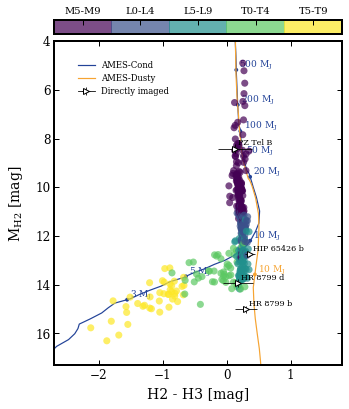

In [19]:
from IPython.display import Image
Image('color_mag.png') 